## Data Source

In [85]:
!cd data/ && ls *.csv

AB_NYC_2019.csv


## Imports

In [140]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import missingno
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
plt.style.use('seaborn-whitegrid')

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Working through the data

In [87]:
airbnb = pd.read_csv("data/AB_NYC_2019.csv")
airbnb.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [88]:
# Bird's-eye view of the data
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [89]:
# Getting count of all the null data
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [90]:
# Dropping values having no effect on the EDA
airbnb.drop(['id', 'host_name', 'last_review'], axis=1, inplace=True)

In [91]:
airbnb.columns

Index(['name', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

### Handling null value
- Since name and host_name play no role in the analysis process, they can be ignored
- last_review and reviews_per_month can be filled with 0

In [92]:
# Replacing all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)

# Checking for nulls
airbnb.reviews_per_month.isnull().sum()

0

### Exploring categorical variables
Looking at the categorical values like - neighbourhood_group, neighbourhood, room_type

In [93]:
cat_list = ["neighbourhood_group", "neighbourhood", "room_type"]
for i in cat_list:
    print(i)
    print(len(airbnb[i].unique()))
    if len(airbnb[i].unique()) < 20:
        print(airbnb[i].unique())
    print("\n")

neighbourhood_group
5
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


neighbourhood
221


room_type
3
['Private room' 'Entire home/apt' 'Shared room']




### Exploring all other attributes(left to right)

In [98]:
top_host = airbnb['host_id'].value_counts().head(10)

In [99]:
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [100]:
top_host_df = pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df.head()

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96


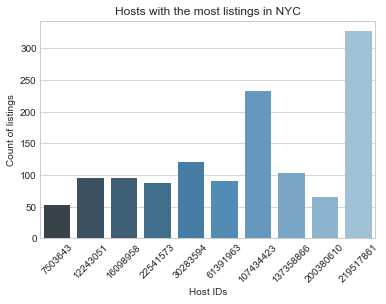

In [106]:
viz1 = sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz1.set_title('Hosts with the most listings in NYC')
viz1.set_ylabel('Count of listings')
viz1.set_xlabel('Host IDs')
viz1.set_xticklabels(viz1.get_xticklabels(), rotation=45);

### Neighbourhood_group based distribution

In [134]:
neighbourhood_groups = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
neighbourhood_df = pd.DataFrame()

for group in neighbourhood_groups:
    group_series = airbnb[airbnb['neighbourhood_group'] == group]['price']
    # Doesn't append to df if index is being carried over
    group_series.reset_index(inplace=True, drop=True)
    neighbourhood_df[group] = group_series

In [137]:
neighbourhood_df.head()

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
0,149,225,130.0,70.0,40.0
1,89,150,70.0,36.0,45.0
2,60,80,140.0,37.0,90.0
3,89,200,79.0,37.0,105.0
4,140,79,350.0,36.0,90.0


In [136]:
# Prices key data
neighbourhood_df.describe()

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
count,20104.000000,20104.000000,5666.000000,373.000000,1091.000000
mean,124.383207,193.718961,99.517649,114.812332,87.496792
std,186.873538,293.058919,167.102155,277.620403,106.709349
min,0.000000,0.000000,10.000000,13.000000,0.000000
25%,60.000000,95.000000,50.000000,50.000000,45.000000
50%,90.000000,147.000000,75.000000,75.000000,65.000000
75%,150.000000,215.000000,110.000000,110.000000,99.000000
max,10000.000000,10000.000000,10000.000000,5000.000000,2500.000000


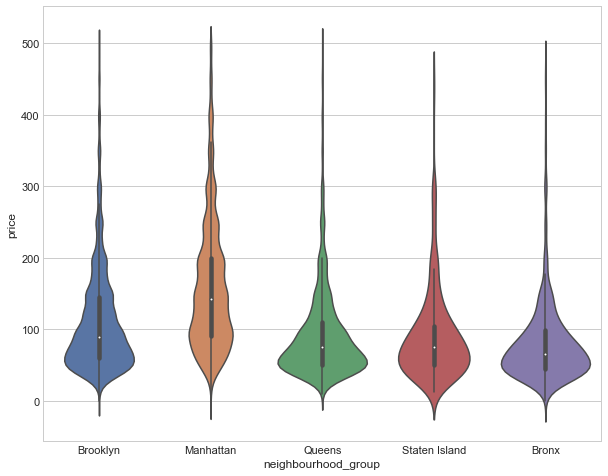

In [141]:
# Creating a violin plot of prices
viz2 = sns.violinplot(x="neighbourhood_group", y="price", data=airbnb[airbnb['price'] < 500])

### Neighbourhood discussion

In [149]:
neighbourhood_top10 = list(airbnb.neighbourhood.value_counts().head(10).index)

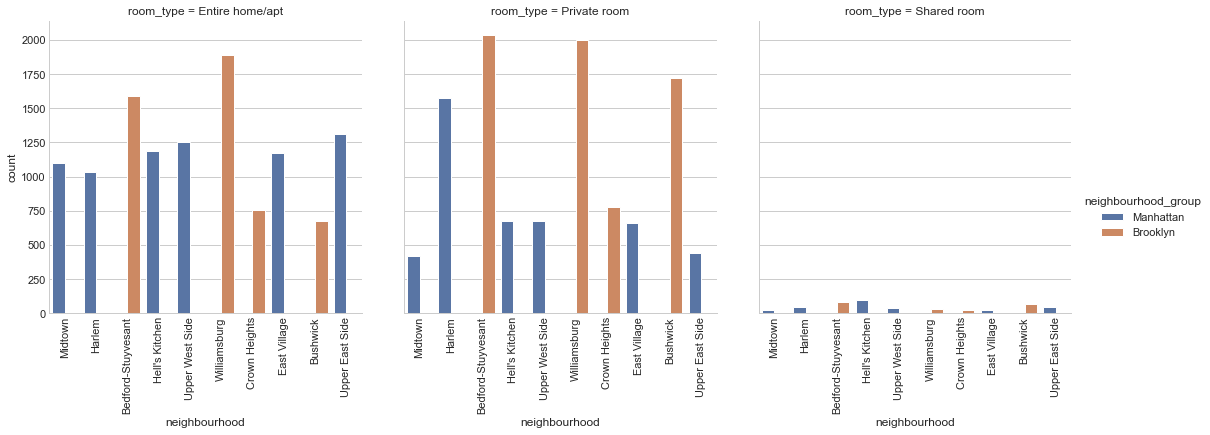

In [154]:
viz3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=airbnb.loc[airbnb['neighbourhood'].isin(neighbourhood_top10)], kind='count')
viz3.set_xticklabels(rotation=90)

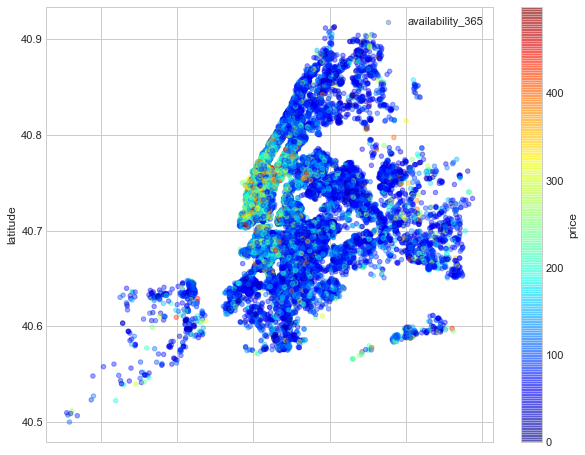

In [157]:
viz4 = airbnb[airbnb.price < 500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz4.legend()


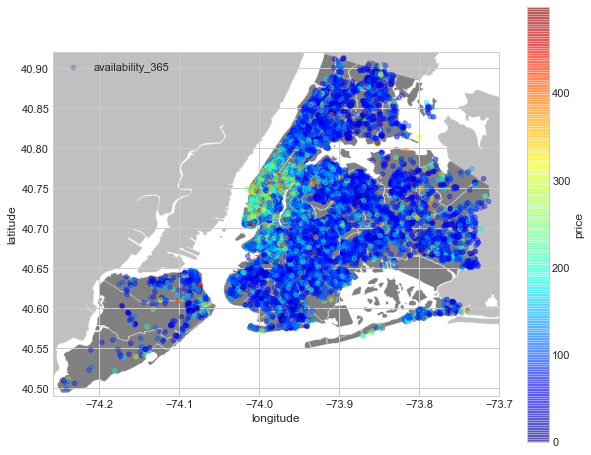

In [160]:
# Getting the data on a map

import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img = plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax = plt.gca()
#using scatterplot again
airbnb[airbnb.price < 500].plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

### Analysis of the names

In [165]:
all_tags = []
for list_name in airbnb.name:
    try:
        all_tags.extend(list_name.split())
    except:
        continue

In [184]:
# Getting the most used words
from collections import Counter

top_25_tags = Counter(all_tags).most_common()[:30]

In [185]:
tag_df = pd.DataFrame(top_25_tags, columns=['tag', 'occurance'])

In [186]:
tag_df.head()

,tag,occurance
0,in,15806
1,Private,4975
2,Room,4815
3,room,4165
4,Bedroom,4125


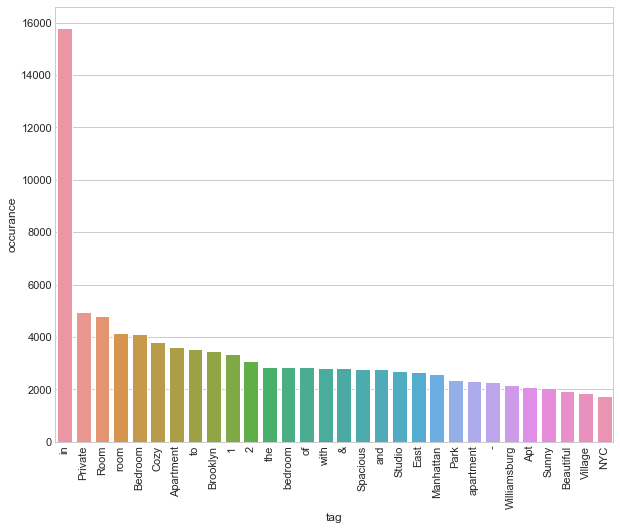

In [187]:
viz5 = sns.barplot(x="tag", y="occurance", data=tag_df)
viz5.set_xticklabels(viz5.get_xticklabels(), rotation=90);

### Average Price of all listings

In [198]:
# Average of all the listings
airbnb['price'].mean()

152.7206871868289